In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


**Splitting the dataset into the Training set and Test set**

In [5]:
X = df[["Age","EstimatedSalary"]]
Y = df["Purchased"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

**Feature Scaling**

In [6]:
ss = StandardScaler()
ss.fit(x_train)
ssx_train = ss.transform(x_train)
ssx_test = ss.transform(x_test)

**Fitting SVM to the Training set**

In [7]:
svm = SVC()
svm.fit(ssx_train,y_train)

SVC()

**Predicting the Test set results**

In [8]:
y_pred = svm.predict(ssx_test)

**Making the Confusion Matrix**

[[73  6]
 [ 2 39]]


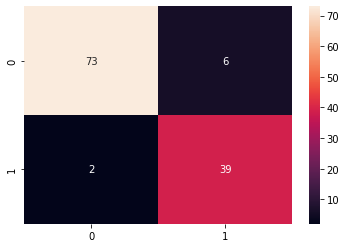

In [9]:
print(confusion_matrix(y_test,y_pred))
confustion_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(confustion_mat, annot=True)

**Visualising the Training set results**

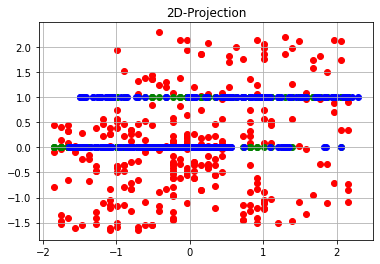

In [10]:
sample1 = ssx_train[:,0]
sample2 = ssx_train[:,1]
plt.scatter(sample1,sample2,c="r")
plt.scatter(sample1,y_train,c="g")
plt.scatter(sample2,y_train,c="b")
plt.title("2D-Projection")
plt.grid()
plt.show()

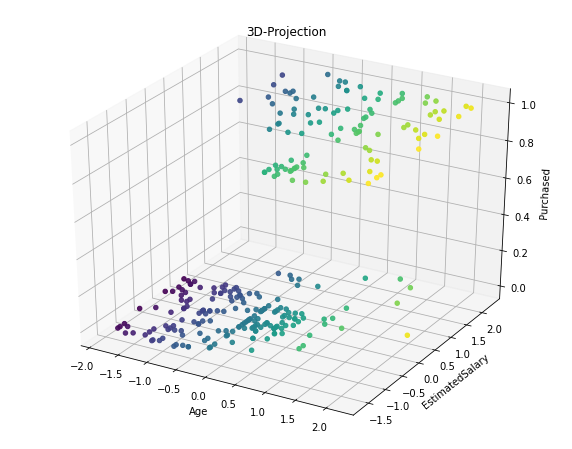

In [11]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection = "3d")
fig = ax.scatter3D(sample1,sample2,y_train,c=sample1,alpha=0.9)
ax.set_xlabel('Age')
ax.set_ylabel('EstimatedSalary')
ax.set_zlabel('Purchased')
ax.set_title("3D-Projection")
plt.show()

**Visualising the Test set results**

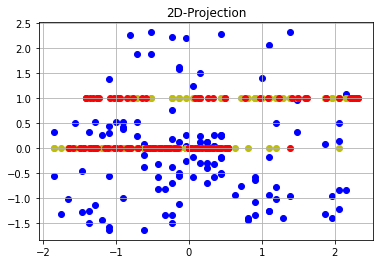

In [12]:
test_sample1 =ssx_test[:,0]
test_sample2 = ssx_test[:,1]
plt.scatter(test_sample1,test_sample2,c="b")
plt.scatter(test_sample1,y_test,c="y")
plt.scatter(test_sample2,y_test,c="r")
plt.title("2D-Projection")
plt.grid()
plt.show()

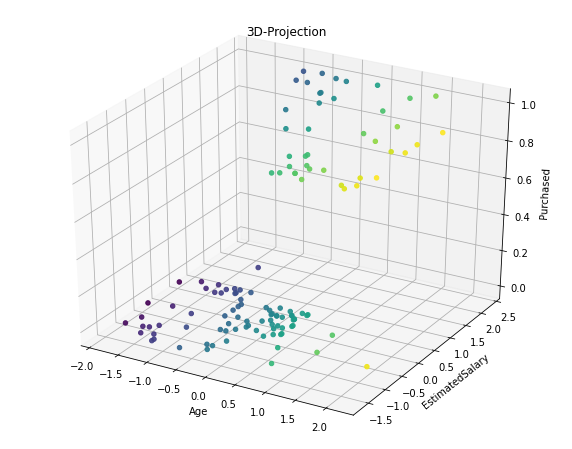

In [13]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection = "3d")
fig = ax.scatter3D(test_sample1,test_sample2,y_test,c=test_sample1,alpha=0.9)
ax.set_xlabel('Age')
ax.set_ylabel('EstimatedSalary')
ax.set_zlabel('Purchased')
ax.set_title("3D-Projection")
plt.show()